# High Dimensional Data

All of our work to this point is building dimensions on the bases of linear algebra and function analysis. This section involves studying some of the specific characteristics of high dimensionality that affect your analysis and data preparation.

1. High dimensional data cannot be intuited without modification
2. As dimensions increase, the number of choices explode
3. Selecting good data gets more difficult
4. In extremely high dimensional cases, only automated methods can be used.

In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt

(-1, 1)

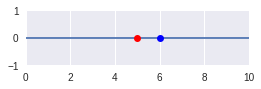

In [2]:
# 1d data

x = 5
y = 6

plt.figure(figsize=(4,1))
plt.axhline(0)
plt.plot(x,0,'ro')
plt.plot(y,0,'bo')
plt.plot((x+y)/2,'o',c="black")
plt.xlim((0,10))
plt.ylim((-1,1))

(0, 10)

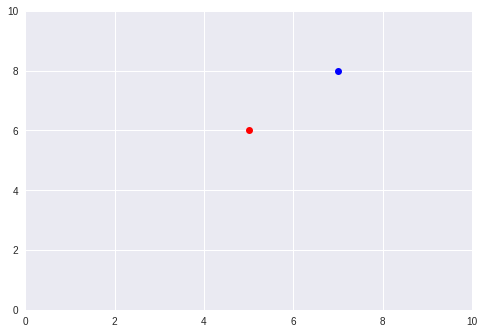

In [3]:
# 2d data

x = np.array([5,6])
y = np.array([7,8])

plt.plot(x[0],x[1],'ro')
plt.plot(y[0],y[1],'bo')
plt.xlim((0,10))
plt.ylim((0,10))

   x  y   z
0  5  6   7
0  8  9  10


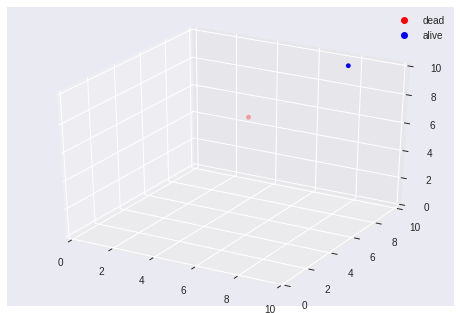

In [4]:
# 3d data
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

a = pd.DataFrame([5,6,7]).T
b = pd.DataFrame([8,9,10]).T
data = pd.concat([a,b])
data.columns = ['x','y','z']
print(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x'], data['y'], data['z'], c=['r','b'])
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)

import matplotlib.lines as lines
scatter1_proxy = lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o')
scatter2_proxy = lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
ax.legend([scatter1_proxy, scatter2_proxy], ['dead', 'alive'], numpoints = 1);


# What about 4d?

We've played with high dimensional random datasets so far. Random data is random data, by and large, though we can create interesting datasets from it. Real data is better.

## Back to Titanic

In [0]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['alive','adult_male','who','class','embark_town'], axis=1)
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')


Any more NaN?
survived    False
pclass      False
sex         False
age         False
sibsp       False
parch       False
fare        False
embarked    False
alone       False
dtype: bool
   survived  pclass     sex   age  sibsp  parch     fare embarked  alone
0         0       3    male  22.0      1      0   7.2500        S  False
1         1       1  female  38.0      1      0  71.2833        C  False
2         1       3  female  26.0      0      0   7.9250        S   True
3         1       1  female  35.0      1      0  53.1000        S  False
4         0       3    male  35.0      0      0   8.0500        S   True


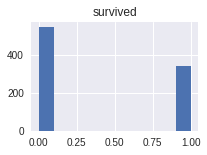

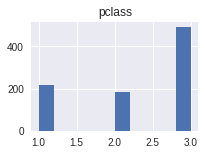

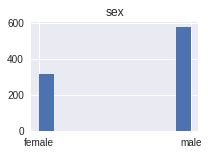

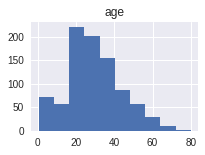

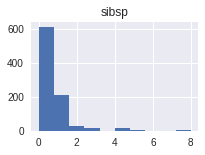

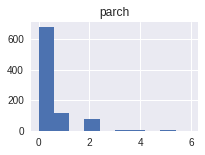

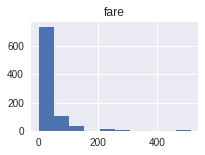

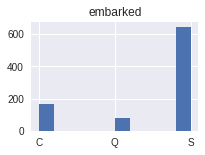

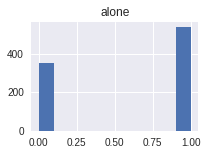

In [6]:
print('Any more NaN?')
print(titanic.isna().any())

print(titanic.head())

for col in titanic.columns:
    plt.figure(figsize=(3,2))
    titanic[col].hist()
    plt.title(col)
    plt.show()

Three binomials, two categoricals, and four numerical features.

In [0]:
from sklearn.preprocessing import LabelEncoder

# Convert binomials and categoricals to encoded labels
for label in ['embarked','sex', 'alone']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: survived, dtype: int64
0     red
1    blue
1    blue
1    blue
0     red
0     red
0     red
0     red
1    blue
1    blue
dtype: object


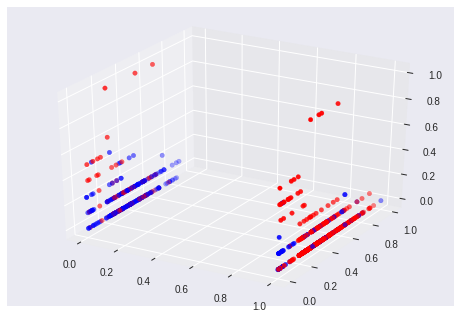

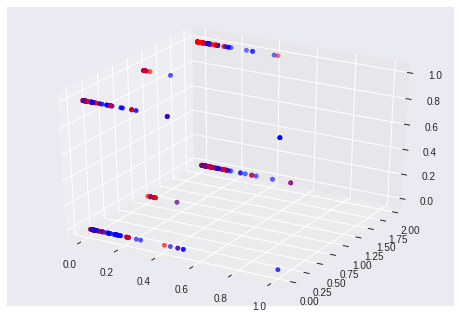

In [67]:
# 3d data
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

labels = titanic['survived']
features = titanic.drop(['survived'],axis=1)

# 0, red
# 1, blue
#["red","blue"][0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
#["red", "red", "blue", "blue", "blue"]

# Convert labels to colors
colors = pd.Series(['red','blue'])[labels.values]
print(labels.head(10))
print(colors.head(10))

# Start graphing...
def plot3axes(data,axes):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[axes[0]], data[axes[1]], data[axes[2]], c=colors)
    return ax

plot3axes(features,['sex','age','sibsp'])
plot3axes(features,['fare','embarked','alone']);

In [9]:
# separating the data by the category you want is huge

women = titanic[titanic['sex'] == 0]
men = titanic[titanic['sex'] == 1]
print(women.head(10))

    survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
1          1       1    0  38.0      1      0  71.2833         0      0
2          1       3    0  26.0      0      0   7.9250         2      1
3          1       1    0  35.0      1      0  53.1000         2      0
8          1       3    0  27.0      0      2  11.1333         2      0
9          1       2    0  14.0      1      0  30.0708         0      0
10         1       3    0   4.0      1      1  16.7000         2      0
11         1       1    0  58.0      0      0  26.5500         2      1
14         0       3    0  14.0      0      0   7.8542         2      1
15         1       2    0  55.0      0      0  16.0000         2      1
18         0       3    0  31.0      1      0  18.0000         2      0


# Assignment in 8D

* Calculate the centroid of the survivors.
* Calculate the centroid of the casualties.
* Calculate the average distance between each survivor.
* Calculate the average distance between each casualty.
* Calculate the distance between the two centroids. Along which axis is this distance the greatest? The least?


## Additional Preprocessing

So that some features do not contribute to the distance between points a disproportionate amount due to their scale, I will scale `fare` to be between 0 and 1. I will do the same with `pclass`, `parch`, and `sibsp`, since they are categorical variables with a meaningful ordering. Embarked does not have a meaningful order, so I will one-hot encode that feature.



In [0]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

titanic[['fare', 'age', 'pclass', 'sibsp', 'parch']] = pd.DataFrame(MinMaxScaler().fit_transform(titanic[['fare', 'age', 'pclass', 'sibsp', 'parch']]), 
                                                             columns=['fare', 'age', 'pclass', 'sibsp', 'parch'])

In [0]:
embarked_one_hot = OneHotEncoder().fit_transform(titanic[['embarked']]).toarray()

# by inspection, 0 -> Southampton, 1 -> Cherbourg, 2 -> Queenstown

embarked = pd.DataFrame(embarked_one_hot, columns=['Southampton', 'Cherbourg', 'Queenstown'], dtype=np.int64)

In [0]:
titanic_enc = titanic.join([embarked]).drop(['embarked'], axis=1)

In [13]:
titanic_enc.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,Southampton,Cherbourg,Queenstown
0,0,1.0,1,0.271174,0.125,0.0,0.014151,0,0,0,1
1,1,0.0,0,0.472229,0.125,0.0,0.139136,0,1,0,0
2,1,1.0,0,0.321438,0.000,0.0,0.015469,1,0,0,1
3,1,0.0,0,0.434531,0.125,0.0,0.103644,0,0,0,1
4,0,1.0,1,0.434531,0.000,0.0,0.015713,1,0,0,1


## Finding Centroids

The centroid of a set of 8D vector is itself an 8D vector where each component corresponds to the mean of the values of that component over the set.

In order to solve this problem, I will first divide the data into two subsets, one for survivors and one for casualties. [`np.mean`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html), with the appropriate `axis` argument, can then handle calculating the centroid. The pandas [`as_matrix()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html) DataFrame method can be used to convert the data to a numpy representation.

In [0]:
survivors = titanic_enc[titanic_enc['survived'] == 1]
casualties = titanic_enc[titanic_enc['survived'] == 0]

In [15]:
survivors.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,alone,Southampton,Cherbourg,Queenstown
1,1,0.0,0,0.472229,0.125,0.0,0.139136,0,1,0,0
2,1,1.0,0,0.321438,0.000,0.0,0.015469,1,0,0,1
3,1,0.0,0,0.434531,0.125,0.0,0.103644,0,0,0,1


In [16]:
casualties.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,alone,Southampton,Cherbourg,Queenstown
0,0,1.0,1,0.271174,0.125,0.0,0.014151,0,0,0,1
4,0,1.0,1,0.434531,0.000,0.0,0.015713,1,0,0,1
5,0,1.0,1,0.434531,0.000,0.0,0.016510,1,0,1,0


I will drop the `survived` columns from these DataFrames, since it is a global label, and won't add information when the centroid is calculated from the features.

In [0]:
survivors = survivors.drop('survived', axis=1)
casualties = casualties.drop('survived', axis=1)

In [18]:
survivor_centroid = np.mean(survivors.as_matrix(), axis=0)
casualty_centroid = np.mean(casualties.as_matrix(), axis=0)

print("Survivors centered around:", survivor_centroid)
print("Casualties centered around:", casualty_centroid)

Survivors centered around: [0.4751462  0.31871345 0.35125748 0.05921053 0.07748538 0.09446154
 0.47660819 0.2748538  0.09064327 0.63450292]
Casualties centered around: [0.76593807 0.85245902 0.37590337 0.06921676 0.05494839 0.04317124
 0.68123862 0.13661202 0.0856102  0.77777778]


## Average Distance Between Points in the Same Cluster

I will simply enumerate all possible pairs of points, calculate the distances between them, and average.

In [0]:
def distance(v1, v2):
    return np.linalg.norm(v1-v2)

def average_point_distance(cluster):
    """Averages over all possible distances between any two points in a set of points
    
    Args:
        cluster (np.ndarray): rank 2 array, with rows corresponding to vectors
        
    Returns:
        The numeric (float) value of the average distance between points in 'cluster'
    """
    
    distances = [distance(cluster[i], cluster[j]) for i in range(cluster.shape[0]) for j in range(cluster.shape[0]) if j > i]
    
    return np.mean(distances)

In [0]:
survivor_average_distance = average_point_distance(survivors.as_matrix())
casualty_average_distance = average_point_distance(casualties.as_matrix())

In [21]:
print("Survivors an average of {} apart".format(survivor_average_distance))
print("Casualties an average of {} apart".format(casualty_average_distance))

Survivors an average of 1.4965355772670488 apart
Casualties an average of 1.2271173101548993 apart


## Distance Between Centroids

Since the centroids are themselves vectors, their distance can be calculated as the magnitude of their vector difference.

In [22]:
centroid_distance = distance(survivor_centroid, casualty_centroid)

print("Centroids {} apart".format(centroid_distance))

Centroids 0.6744092334853754 apart


The distance between centroids as not as great as the average distance between both survivors and casualties. This indicates that considering all features of the data jointly does not yield too much predictive power. Clearly, the two clusters are not linearly separable in the 8D space.

## Considering Individual Dimensions

So far, I have dealt with the global centroids of all 8 features (10, if the one hot encoded feature is treated as 3). We can also consider features individually and perform the same analysis. In one dimension, the term "mean" is generally used instead of centroid, since it is not as meaningful to treat the values as vectors.

In [31]:
print((survivors.columns.all()==casualties.columns.all()))

# the features are the same for both survivors and casualties

def get_cluster_data(survivors, casualties, subsets, log_every=50):
    cluster_data = pd.DataFrame([])
    for subset in subsets:
        data_s = survivors[subset].as_matrix()
        data_c = casualties[subset].as_matrix()
        
        centroid_s = np.mean(data_s, axis=0)
        centroid_c = np.mean(data_c, axis=0)
        
        distance_s = average_point_distance(data_s)
        distance_c = average_point_distance(data_c)
        
        centroid_distance = distance(centroid_s, centroid_c)
        
        data = pd.DataFrame([[distance_s, distance_c, centroid_distance]], index=[str(subset)], columns=["Average Distance Between Survivors",
                                         "Average Distance Between Casualties",
                                         "Distance Between Centroids"])
        
        cluster_data = cluster_data.append(data)
        
        if cluster_data.shape[0] % log_every == 0:
            print("{} subsets analyzed...".format(cluster_data.shape[0]))
        
    return cluster_data

True


In [0]:
data = get_cluster_data(survivors, casualties, survivors.columns)

In [33]:
data

,Average Distance Between Survivors,Average Distance Between Casualties,Distance Between Centroids
pclass,0.467776,0.343571,0.290792
sex,0.435544,0.252004,0.533746
age,0.216515,0.196545,0.024646
sibsp,0.080435,0.115204,0.010006
parch,0.115882,0.094979,0.022537
fare,0.105845,0.044693,0.051290
alone,0.500369,0.435098,0.204630
Southampton,0.399787,0.236329,0.138242
Cherbourg,0.165338,0.156848,0.005033
Queenstown,0.465178,0.346310,0.143275


In [34]:
print("Min:")
print(data.min(), '\n')
print("Max:")
print(data.max())

Min:
Average Distance Between Survivors     0.080435
Average Distance Between Casualties    0.044693
Distance Between Centroids             0.005033
dtype: float64 

Max:
Average Distance Between Survivors     0.500369
Average Distance Between Casualties    0.435098
Distance Between Centroids             0.533746
dtype: float64


The largest difference between centroid components is along the `sex` dimension. This is in line with well-known results. `pclass` and `alone` have the 2nd and 3rd greatest differences in their means. Large differences can be interpreted as saying that the average `sex` of a survivor, for instance, was quite different from he average `sex` of a casualty.

The dimensions with the tightest clusters are `sibsp` and `fare`, for survivors and casualties respectively. This can be interpreted as meaning that survivors were similar to each other in terms of their `sibsp` value while casualties were similar to each other in terms of their `fare`.

Note that these are two slightly different forms of reasoning about the distribution of features given the outcome (survivor vs casualty).

# Stretch Goal

## Automate it: Find the optimal set of dimensions

* Automate this: Find the set of dimensions where: the mean distance between each survivor and the mean distance between each casualty is less than the distance.

The set of dimensions that maximizes centroid distance and minimizes the cluster distances is the "best" dataset. Or is it? Why do we need the other dimensions? What if we have 30 dimensions and not just 8? What if there is no optimal clustering arrangement?

Instead of considering each dimension separately, I will now consider every possible subset of dimensions.

What I am performing now is feature selection, where my selection criteria are the centroid and cluster distances. This form of selection generalizes to higher dimensions. 

In [0]:
from itertools import chain, combinations

In [0]:
def all_subsets(data_cols):
    return chain(*map(lambda x: combinations(data_cols, x), range(0, len(data_cols)+1)))

In [0]:
subsets = [list(subset) for subset in all_subsets(survivors.columns) if len(subset) > 0]

In [38]:
data = get_cluster_data(survivors, casualties, subsets)

50 subsets analyzed...
100 subsets analyzed...
150 subsets analyzed...
200 subsets analyzed...
250 subsets analyzed...
300 subsets analyzed...
350 subsets analyzed...
400 subsets analyzed...
450 subsets analyzed...
500 subsets analyzed...
550 subsets analyzed...
600 subsets analyzed...
650 subsets analyzed...
700 subsets analyzed...
750 subsets analyzed...
800 subsets analyzed...
850 subsets analyzed...
900 subsets analyzed...
950 subsets analyzed...
1000 subsets analyzed...


In [39]:
data.head()

,Average Distance Between Survivors,Average Distance Between Casualties,Distance Between Centroids
['pclass'],0.467776,0.343571,0.290792
['sex'],0.435544,0.252004,0.533746
['age'],0.216515,0.196545,0.024646
['sibsp'],0.080435,0.115204,0.010006
['parch'],0.115882,0.094979,0.022537


In [40]:
data.tail()

,Average Distance Between Survivors,Average Distance Between Casualties,Distance Between Centroids
"['pclass', 'sex', 'age', 'parch', 'fare', 'alone', 'Southampton', 'Cherbourg', 'Queenstown']",1.490492,1.207978,0.674335
"['pclass', 'sex', 'sibsp', 'parch', 'fare', 'alone', 'Southampton', 'Cherbourg', 'Queenstown']",1.465475,1.184487,0.673959
"['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'Southampton', 'Cherbourg', 'Queenstown']",1.335193,1.124982,0.412242
"['sex', 'age', 'sibsp', 'parch', 'fare', 'alone', 'Southampton', 'Cherbourg', 'Queenstown']",1.357310,1.090187,0.608496
"['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone', 'Southampton', 'Cherbourg', 'Queenstown']",1.496536,1.227117,0.674409


In [0]:
centroid_lessthan_cluster = data[(data["Average Distance Between Casualties"] < data["Distance Between Centroids"]) 
                                 & (data["Average Distance Between Survivors"] < data["Distance Between Centroids"])]

In [58]:
centroid_lessthan_cluster

,Average Distance Between Survivors,Average Distance Between Casualties,Distance Between Centroids
['sex'],0.435544,0.252004,0.533746
"['sex', 'sibsp']",0.485288,0.334171,0.533839
"['sex', 'parch']",0.509766,0.311430,0.534221
"['sex', 'fare']",0.503478,0.286687,0.536204
"['sex', 'sibsp', 'fare']",0.536146,0.356386,0.536298


In [0]:
distance_ratios = 2 * data["Distance Between Centroids"] / (data["Average Distance Between Casualties"] + data["Average Distance Between Survivors"])

# get the subsets with the 10 smallest distance ratios
small_distance_ratios = distance_ratios[distance_ratios < sorted(distance_ratios)[10]]

In [64]:
small_distance_ratios

['sibsp']                                 0.102293
['Cherbourg']                             0.031243
['age', 'sibsp']                          0.102884
['age', 'Cherbourg']                      0.074263
['sibsp', 'Cherbourg']                    0.045486
['parch', 'Cherbourg']                    0.090625
['age', 'sibsp', 'Cherbourg']             0.070246
['age', 'parch', 'Cherbourg']             0.086300
['sibsp', 'parch', 'Cherbourg']           0.080877
['age', 'sibsp', 'parch', 'Cherbourg']    0.082107
dtype: float64

Based on this analysis, there are 5 sets of features such that the distance between the centroids of survivors and casualties is greater than the average distances between pairs of survivors or pairs of casualties. These are:

* `["sex"]`
* `["sex", "sibsp"]`
* `["sex", "parch"]`
* `["sex", "fare"]`
* `["sex", "sibsp", "fare"]`

Similar sets of features have the lowest ratios between the inter-centroid and intra-centroid distances. In particular, passenger who embarked from Cherbourg were clustered, but this can also be due to the fact that most passengers embarked from Cherbourg to begin with, so there is not much variance along that dimension - leading to small intra-centroid distances.

We can visualize the features of `["sex", "sibsp", "fare"]` to gain some intuition about the result of these findings.

[Text(0.5,0,'fare (scaled between (0, 1)'),
 Text(0.5,0,'sibsp (scaled between (0, 1))'),
 Text(0.5,0,'sex (0: female, 1: male)'),
 Text(0.5,0.92,'Titanic Passengers (casualties in red)')]

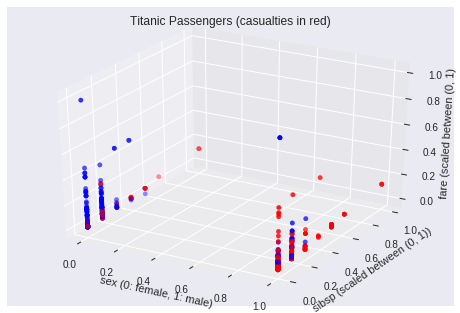

In [72]:
ax = plot3axes(titanic, ['sex', 'sibsp', 'fare'])
ax.set(title="Titanic Passengers (casualties in red)", xlabel='sex (0: female, 1: male)', ylabel='sibsp (scaled between (0, 1))', zlabel='fare (scaled between (0, 1)')